In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


In [4]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s

# Create Return column from percent change of Settle Price
yen_futures['Return'] = yen_futures["Settle"].pct_change() * 100

# Drop Nan Values
yen_futures = yen_futures.dropna()

# Show Tail
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509


In [5]:
# Create a lagged return using the shift function
yen_futures['Lagged_Return'] = yen_futures["Return"].shift()

# Drop NaN values
yen_futures = yen_futures.dropna()

# show tail
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2018']
test = yen_futures['2018':]

# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
X_train = train["Lagged_Return"]

# X Test
X_test = test["Lagged_Return"]

# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
y_train = train["Return"]

# y test
y_test = test["Return"]

In [7]:
# Function to test train and test splits
def trainTest(X_train, X_test, y_train, y_test):
    
    # Linear Regression Model
    model = LinearRegression()
    
    # Fit SKLearn Linear Regression
    model.fit(X_train.to_frame(), y_train)
    
    # Make prediction of Y values
    predictions = model.predict(X_test.to_frame())
    
    # Assemble actual y data in DataFrame
    Results = y_test.to_frame()
    
    # Adding predicted y data to DataFrame
    Results["Predicted Return"] = predictions
    
    # Plot the first 20 predictions vs the true values
    first_20 = Results[:20].plot(subplots=True);
    
    # DataFrame using y training data
    in_sample = y_train.to_frame()
    
    # In Sample Predictions column
    in_sample["In-sample Predictions"] = model.predict(X_train.to_frame())
    
    # Calculate in-sample mean squared error
    in_sample_mean = mean_squared_error(in_sample["Return"],in_sample["In-sample Predictions"])
    
    # Calculate in-sample root mean_squared_error
    in_sample_root = np.sqrt(in_sample_mean)
    
    # Mean Square Error calculation
    mean_squared_error = np.sqrt(in_sample_mean)
    
    # Root Mean Square Error calcualtion
    root_mean_error = np.sqrt(mse)
    
    # Return Plot, RMSE
    return first_20, in_sample, rmse

UnboundLocalError: local variable 'mean_squared_error' referenced before assignment

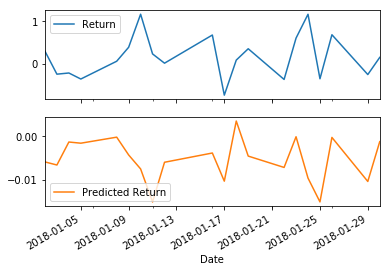

In [8]:
# Assign return values to variables
first_20, in_root, out_root = trainTest(X_train, X_test, y_train, y_test)

# Print Analysis
print(f"""In-sample Root Mean Squared Error (RMSE): {in_root}
Out-of-Sample Root Mean Squared Error: {out_rmse}""")

In [ ]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
x_train, x_test, y_train, y_test = train_test_split(yen_futures['Lagged_Return'], yen_futures["Return", random_state=42])

In [ ]:
# split data based on SKLearn Model Selection's 'train_test_split'
X_train, X_test, y_train, y_test = train_test_split(yen_futures['Lagged_Return'], yen_futures["Return"], random_state=42)

In [ ]:
# assign return values to variables
mod_first_20_plot, mod_in_rmse, mod_out_rmse = trainTest(X_train, X_test, y_train, y_test)

# print analysis
print(f"""In-sample Root Mean Squared Error (RMSE): {mod_in_rmse}
Out-of-Sample Root Mean Squared Error: {mod_out_rmse}""")

In [ ]:
# find difference between out sample results
out_diff = mod_out_rmse - out_rmse

# condition if difference favors sklearn model selection: 'train_test_split'
if out_diff > 0:
    
    # Print analysis
    print("SKLearn Model Selection 'train_test_split' was better for splitting the dataset than our manual selection")
    
# Condition if difference is none
elif out_diff == 0:
    
    # Print analysis
    print("There wasn't a difference between SKLearn Model Selection 'train_test_split' and our manual selection")
    
# Condition if difference favors manual seleciton
elif out_diff < 0:
    
    # Print analysis
    print("SKLearn Model Selection 'train_test_split' was worse at splitting the dataset than our manual selection")

In [9]:
# specify output location
output_file_loc = "../Starter_Code/conclusions.txt"

# write trends observed in text file
with open(output_file_loc, "a",) as txtfile:
    txtfile.write(f"""
On the out-of-sample data when using the manual selection for train/test splits, the model performed significantly worse. Using SKLearn model selection for 'train_test_split', the model produces comparable results for out-of-sample data and in-sample data.
""")